/home/df630/.conda/envs/conditional_rate_matching/lib/python3.10/site-packages/tqdm-4.66.1-py3.10.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-11-22 21:38:36,785] A new study created in memory with name: no-name-15160cdf-de60-430e-8274-483d22dc62ea
Epoch 1, Loss: 0.7140:   0%|          | 0/1000 [00:00<?, ?it/s]/home/df630/conditional_rate_matching/src/conditional_rate_matching/models/trainers/crm_trainer_dario.py:33: RuntimeWarning: Mean of empty slice.
  self.average_test_loss = np.asarray(self.test_loss).mean()
/home/df630/.conda/envs/conditional_rate_matching/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Epoch 1000, Loss: 0.6967: 100%|██████████| 1000/1000 [00:35<00:00, 28.47it/s]
[I 2023-11-22 21:39:13,428] 

{'bach_size': 97, 'lr': 1.36933407677566e-06, 'dim_hid': 42, 'num_layers': 4, 'activation': 'SELU', 'gamma': 0.0008353557721681967}


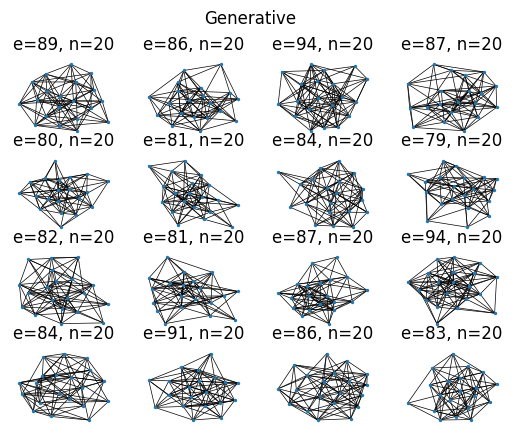

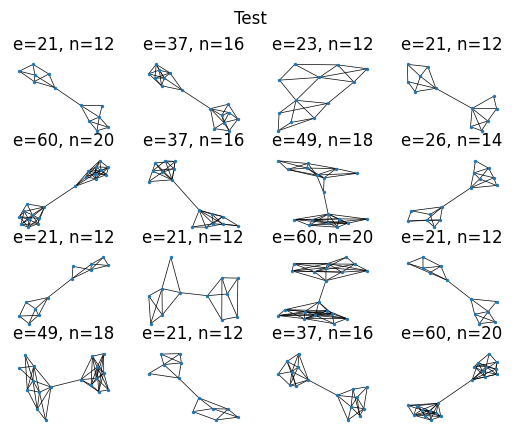

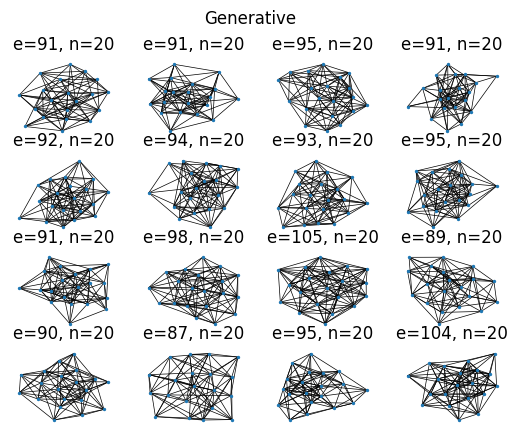

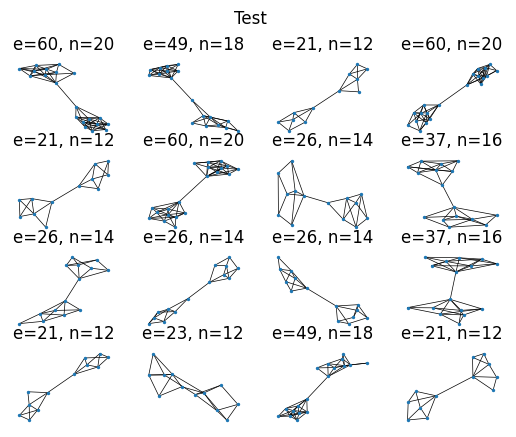

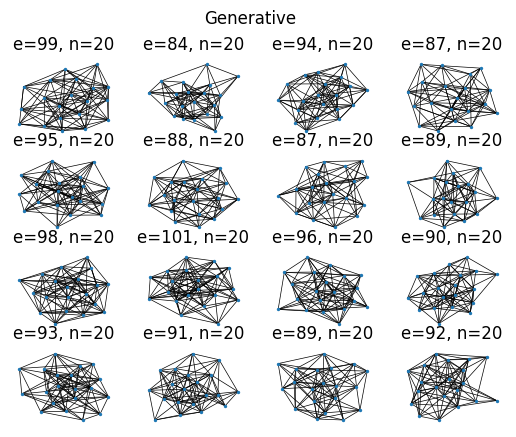

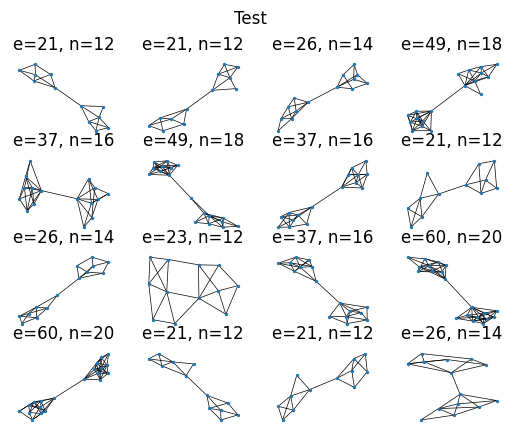

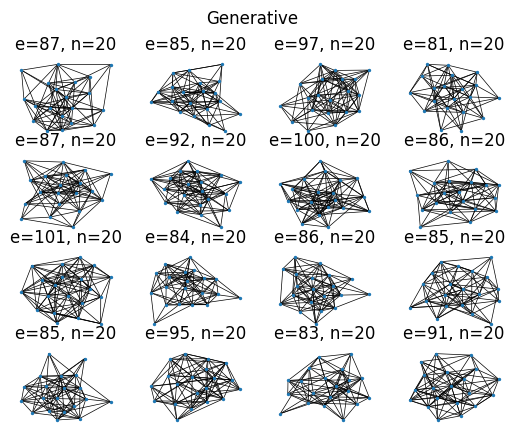

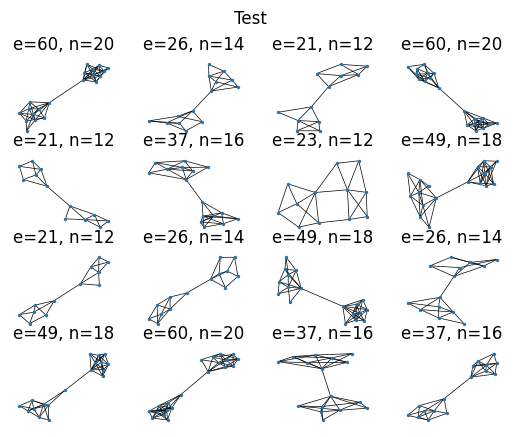

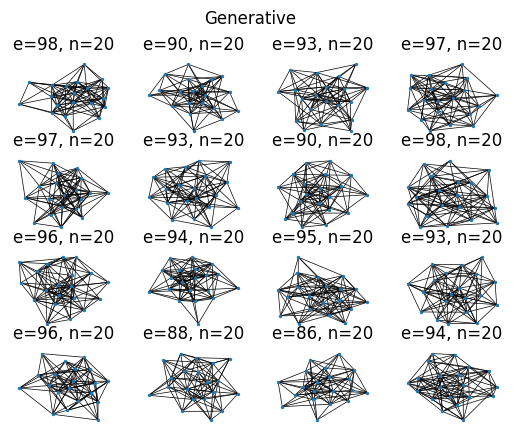

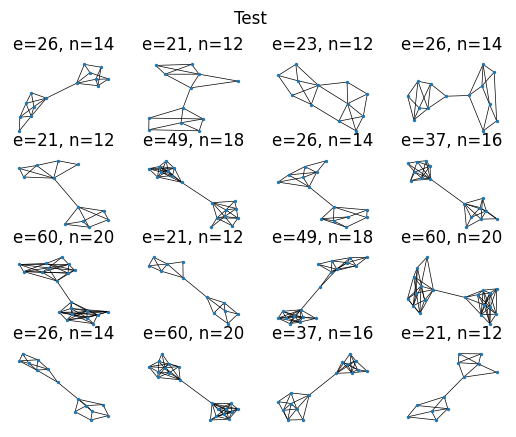

In [1]:
from crm_graph_experiment import ScanOptuna
from optuna.visualization import plot_optimization_history, plot_slice, plot_contour, plot_parallel_coordinate, plot_param_importances

scan = ScanOptuna(n_trials=5,
                 epochs=1000,
                 batch_size=(10, 100),
                 learning_rate=(1e-7, 1e-5), 
                 hidden_dim=(16, 128), 
                  num_layers=(2, 6),
                 activation=('ReLU', 'LeakyReLU', 'GELU', 'SELU', 'CELU', 'ELU', 'Sigmoid', 'Tanh', 'Hardtanh', 'PReLU'),
                 time_embed_dim=64, 
                 gamma=(0.00001, 1),
                 device='cuda:0'
                 )


In [2]:
scan.study.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0       0  0.217618 2023-11-22 21:38:36.787082 2023-11-22 21:39:13.427771   
1       1  0.215500 2023-11-22 21:39:13.428599 2023-11-22 21:39:27.337970   
2       2  0.252868 2023-11-22 21:39:27.338827 2023-11-22 21:40:02.325427   
3       3  0.221803 2023-11-22 21:40:02.326322 2023-11-22 21:40:50.044874   
4       4  0.339211 2023-11-22 21:40:50.045743 2023-11-22 21:41:16.001706   

                duration params_activation  params_bach_size  params_dim_hid  \
0 0 days 00:00:36.640689               ELU                32             101   
1 0 days 00:00:13.909371              SELU                97              42   
2 0 days 00:00:34.986600              CELU                38             120   
3 0 days 00:00:47.718552              Tanh                22              71   
4 0 days 00:00:25.955963         LeakyReLU                61              51   

   params_gamma     params_lr  params_num_layers     state  
0      0.095727  4.419538e-07                  4  COMPLETE  
1      0.000835  1.369334e-06                  4  COMPLETE  
2      0.003736  3.051045e-07                  4  COMPLETE  
3      0.234327  5.209111e-07                  6  COMPLETE  
4      0.000095  3.920618e-07                  5  COMPLETE

In [3]:
from optuna.visualization import plot_optimization_history, plot_slice, plot_contour, plot_parallel_coordinate, plot_param_importances

plot_optimization_history(scan.study).show()
plot_slice(scan.study).show()
plot_contour(scan.study).show()
plot_parallel_coordinate(scan.study).show()
plot_param_importances(scan.study).show()

In [4]:
! pip install plotly kaleido


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.6 MB/s eta 0:00:0000:0100:01
